In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [96]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/data/npz_data', 
                                     "Point1_12_18_23_20190606_output_3_class_with_interior_edge" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (4, 1024, 1024, 3) & y.shape: (4, 1024, 1024, 1)


In [13]:
hist = np.load('/data/models/20190621_postprocessing/Point1_12_18_20190606_outputfirst_try.npz')

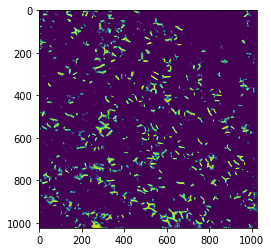

In [99]:
plt.imshow(X[3, :, :, 2])

In [14]:
hist['loss_history'].tolist()['acc']
hist['loss_history']

array({'loss': [0.4365811322939822, 0.4035615130405166, 0.3894755354949871, 0.38105603510378416, 0.3751292904712161, 0.37068186386959323, 0.36762641057277495, 0.3651003843052553, 0.36203971443544175, 0.35912144954716163, 0.3565430818033546, 0.3548032027995774, 0.35208092745595226, 0.3502327763563522, 0.34732106320478134, 0.34444219115794233, 0.3425312636893477, 0.3388952128685256, 0.3370034803229313, 0.3331750366990356, 0.3304514616129909, 0.32771135679479535, 0.32522590983092176, 0.3225604690970863, 0.32049381791825, 0.31845509423000873, 0.31610695314798276, 0.31419720858448685, 0.31259633438253276, 0.31038066472085907], 'acc': [0.7830416826709775, 0.8016430777765587, 0.8097607320551751, 0.8146622360314741, 0.8176976909627794, 0.8208752020041931, 0.8220991574370787, 0.8236424550016296, 0.8251596142429827, 0.8269233828895385, 0.8283393981822719, 0.8290326319932604, 0.8306179781670862, 0.831947623344749, 0.8337011639502553, 0.8356831307797211, 0.8364706898473285, 0.8384344734947384, 0.8

In [40]:
MODEL_NAME = 'Point1_12_18_20190606_output' + 'first_try_epoch_30'
weights_path = os.path.join('/data/models/20190621_postprocessing', 
                            MODEL_NAME + ".h5")

In [41]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=128,
    n_conv_filters=64,
    dilated=True,
    n_features=3,
    norm_method='std',
    receptive_field=61,
    n_channels=3,    
    input_shape=tuple(X.shape[1:]))

run_sample_model.load_weights(weights_path)

In [42]:
test_images = run_sample_model.predict(X[:, :, :, :])

print('model output shape:', test_images.shape)

model output shape: (4, 1024, 1024, 3)


In [43]:
np.save('/data/models/20190621_postprocessing/' + MODEL_NAME + '_metrics', test_images)

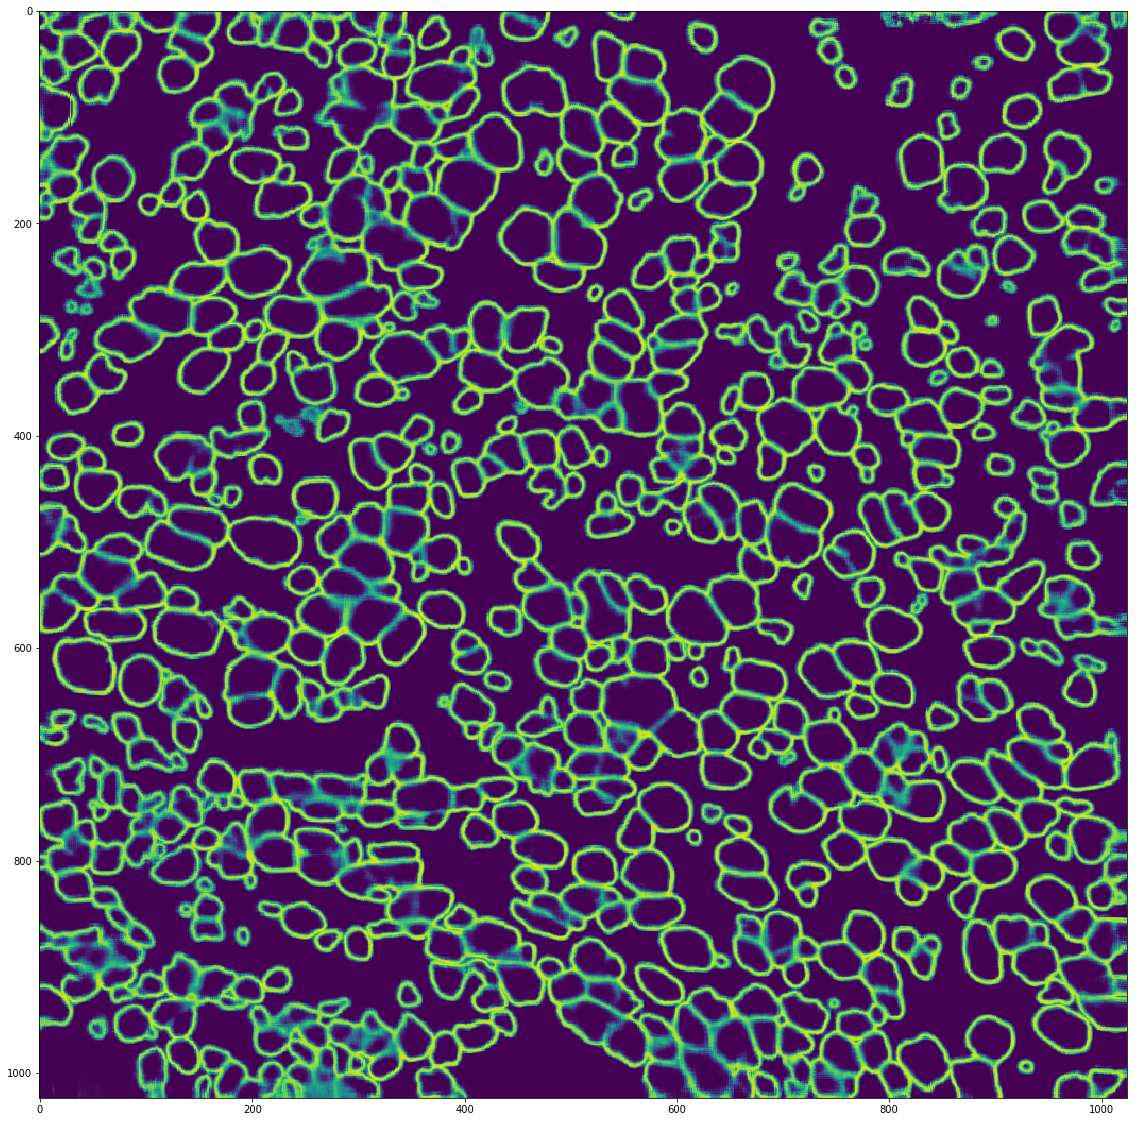

In [44]:
plt.figure(figsize = (20, 20))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
plt.imshow(test_images[3, :, :, 0])
#plt.imshow(test_images[3, :, :, 1])
#plt.imshow(test_images[3, :, :, 0] + test_images[3, :, :, 1])



In [ ]:
# import copy
# test_2 = copy.copy(test_images)
test_2 = np.load('/data/models/' + 'Point1_12_18_3X_interior_save_10' + '_metrics.npy')